In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep=';', na_values=['nonexistent', 'unknown'])

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          5625 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usag

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Idades

In [7]:
data['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

- Qtd de cada instância

In [8]:
data['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

- Verificando valores faltantes

In [9]:
data['age'].isna().sum()

0

# Cargo de Trabalho

In [10]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', nan,
       'entrepreneur', 'student'], dtype=object)

- Qtd de cada instância

In [11]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

- Verificando valores nulos

In [12]:
data['job'].isna().sum()

330

In [13]:
job_map = {'student':1, 'unemployed':2, 'housemaid':3, 'self-employed':4, 'entrepreneur':5, 
           'retired':6, 'management':7, 'services':8, 'technician':9, 'blue-collar':10, 'admin.':11}

In [14]:
data['job'] = data['job'].map(job_map)

In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
data['job'].isna().sum()

330

# Estado Civil

In [17]:
data['marital'].unique()

array(['married', 'single', 'divorced', nan], dtype=object)

- Qtd de cada instância

In [18]:
data['marital'].value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

- Verificando valores nulos

In [19]:
data['marital'].isna().sum()

80

In [20]:
marital_map = {'married':3, 'single':2, 'divorced':1}

In [21]:
data['marital'] = data['marital'].map(marital_map)

In [22]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,high.school,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,high.school,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [23]:
data['marital'].isna().sum()

80

# Escolaridade

In [24]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', nan, 'university.degree', 'illiterate'],
      dtype=object)

- Qtd de cada instâcia

In [25]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

- Verificando valores nulos

In [26]:
data['education'].isna().sum()

1731

- Transformando os valores de analfabeto em graduado

In [27]:
data['education'].replace('illiterate', 'university.degree', inplace=True)
data['education'].value_counts()

university.degree      12186
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
Name: education, dtype: int64

In [28]:
education_map = {'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 
                 'professional.course':5, 'university.degree':6}

In [29]:
data['education'] = data['education'].map(education_map)

In [30]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,NaN,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,no,yes,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,no,no,no,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,no,no,yes,telephone,may,mon,...,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
data['education'].isna().sum()

1731

# Default

In [32]:
data['default'].unique()

array(['no', nan, 'yes'], dtype=object)

- Qtd de cada instância

In [33]:
data['default'].value_counts()

no     32588
yes        3
Name: default, dtype: int64

- Verificando valores faltantes

In [34]:
data['default'].isna().sum()

8597

In [35]:
data.drop('default', axis=1, inplace=True)

In [36]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,no,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,no,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,yes,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,no,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,no,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [37]:
data.shape

(41188, 20)

# Tem empréstimo à habitação?

In [38]:
data['housing'].unique()

array(['no', 'yes', nan], dtype=object)

- Qtd de cada instância

In [39]:
data['housing'].value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

- Verificando valores faltantes

In [40]:
data['housing'].isna().sum()

990

In [41]:
housing_map = {'yes':1, 'no':0}

In [42]:
data['housing'] = data['housing'].map(housing_map)

In [43]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,no,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,no,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,no,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,no,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,yes,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [44]:
data['housing'].isna().sum()

990

# Tem empréstimo pessoal?

In [45]:
data['loan'].unique()

array(['no', 'yes', nan], dtype=object)

- Qtd de cada instância

In [46]:
data['loan'].value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

- Verificando valores faltantes

In [47]:
data['loan'].isna().sum()

990

In [48]:
loan_map = {'yes':1, 'no':0}

In [49]:
data['loan'] = data['loan'].map(loan_map)

In [50]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,telephone,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,0.0,telephone,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,0.0,telephone,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,0.0,telephone,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,1.0,telephone,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
data['loan'].isna().sum()

990

# Forma de contato

In [52]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

- Qtd de cada instância

In [53]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

- Verificando valores faltantes

In [54]:
data['contact'].isna().sum()

0

In [55]:
contact_map = {'telephone':1, 'cellular':2}

In [56]:
data['contact'] = data['contact'].map(contact_map)

In [57]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,1,may,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,0.0,1,may,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,0.0,1,may,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,0.0,1,may,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,1.0,1,may,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
data['contact'].isna().sum()

0

# Último contato do ano

In [59]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

- Qtd de cada instância

In [60]:
data['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

- Verificando valores faltantes

In [61]:
data['month'].isna().sum()

0

In [62]:
month_map = {'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}

In [63]:
data['month'] = data['month'].map(month_map)

In [64]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,1,5,mon,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,0.0,1,5,mon,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,0.0,1,5,mon,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,0.0,1,5,mon,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,1.0,1,5,mon,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [65]:
data['month'].isna().sum()

0

# Último contato da semana

In [66]:
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

- Qtd de cada instância

In [67]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

- Verificando valores faltantes

In [68]:
data['day_of_week'].isna().sum()

0

In [69]:
day_of_week_map = {'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6}

In [70]:
data['day_of_week'] = data['day_of_week'].map(day_of_week_map)

In [71]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,1,5,2,261,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,0.0,1,5,2,149,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,0.0,1,5,2,226,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,0.0,1,5,2,151,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,1.0,1,5,2,307,1,999,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
data['day_of_week'].isna().sum()

0

# Tempo do último contato

In [73]:
data['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868])

- Qtd de cada instância

In [74]:
data['duration'].value_counts()

85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

- Verificando valores faltantes

In [75]:
data['duration'].isna().sum()

0

# Num. de contatos realizados por cliente

In [76]:
data['campaign'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43])

- Qtd de cada instância

In [77]:
data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

- Verificando valores faltantes

In [78]:
data['campaign'].isna().sum()

0

# Qtd de dias antes do último contato da campanha anterior

In [79]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

- Qtd de cada instância

In [80]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

- Verificando valores faltantes

In [81]:
data['pdays'].isna().sum()

0

# Num. de contatos realizados antes dessa campanha

In [82]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

- Qtd de cada instância

In [83]:
data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

- Verificando valores faltantes

In [84]:
data['previous'].isna().sum()

0

# Resultado da campanha anterior de marketing

In [85]:
data['poutcome'].unique()

array([nan, 'failure', 'success'], dtype=object)

- Qtd de cada instância

In [86]:
data['poutcome'].value_counts()

failure    4252
success    1373
Name: poutcome, dtype: int64

- Verificando valores faltantes

In [87]:
data['poutcome'].isna().sum()

35563

- Removendo coluna com muitos atributos nulos

In [88]:
data.drop('poutcome', axis=1, inplace=True)

In [89]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,1,5,2,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,8.0,3.0,4.0,0.0,0.0,1,5,2,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,8.0,3.0,4.0,1.0,0.0,1,5,2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,11.0,3.0,2.0,0.0,0.0,1,5,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,8.0,3.0,4.0,0.0,1.0,1,5,2,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no


In [90]:
data.shape

(41188, 19)

# Taxa de variação de emprego - Indicador trimestral

In [91]:
data['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

- Qtd de cada instância

In [92]:
data['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

- Verificando valores faltantes

In [93]:
data['emp.var.rate'].isna().sum()

0

# Indice de preços ao consumidor - Indicador mensal

In [94]:
data['cons.price.idx'].unique()

array([93.994, 94.465, 93.918, 93.444, 93.798, 93.2  , 92.756, 92.843,
       93.075, 92.893, 92.963, 92.469, 92.201, 92.379, 92.431, 92.649,
       92.713, 93.369, 93.749, 93.876, 94.055, 94.215, 94.027, 94.199,
       94.601, 94.767])

- Qtd de cada instância

In [95]:
data['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

- Verificando valores faltantes

In [96]:
data['cons.price.idx'].isna().sum()

0

# Indice de confiança do consumidor - Indicador mensal

In [97]:
data['cons.conf.idx'].unique()

array([-36.4, -41.8, -42.7, -36.1, -40.4, -42. , -45.9, -50. , -47.1,
       -46.2, -40.8, -33.6, -31.4, -29.8, -26.9, -30.1, -33. , -34.8,
       -34.6, -40. , -39.8, -40.3, -38.3, -37.5, -49.5, -50.8])

- Qtd de cada instância

In [98]:
data['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

- Verificando valores faltantes

In [99]:
data['cons.conf.idx'].isna().sum()

0

# Euribor 3 meses
- Euribor é a junção das palavras Euro Interbank Offered Rate. As taxas Euribor baseiam-se na média das taxas de juros praticadas em empréstimos interbancários em euros por cerca 25/40 bancos proeminentes europeus (o painel de Bancos). Para a determinação das taxas Euribor são excluídos 15 por cento tanto das percentagens mais altas como das percentagens mais baixas relatadas. Todos os dias úteis, às 11:00 horas Hora Central Europeia, as taxas de juro Euribor são divulgadas e transmitidas a todas as partes participantes e imprensa.

In [100]:
data['euribor3m'].unique()

array([4.857, 4.856, 4.855, 4.859, 4.86 , 4.858, 4.864, 4.865, 4.866,
       4.967, 4.961, 4.959, 4.958, 4.96 , 4.962, 4.955, 4.947, 4.956,
       4.966, 4.963, 4.957, 4.968, 4.97 , 4.965, 4.964, 5.045, 5.   ,
       4.936, 4.921, 4.918, 4.912, 4.827, 4.794, 4.76 , 4.733, 4.7  ,
       4.663, 4.592, 4.474, 4.406, 4.343, 4.286, 4.245, 4.223, 4.191,
       4.153, 4.12 , 4.076, 4.021, 3.901, 3.879, 3.853, 3.816, 3.743,
       3.669, 3.563, 3.488, 3.428, 3.329, 3.282, 3.053, 1.811, 1.799,
       1.778, 1.757, 1.726, 1.703, 1.687, 1.663, 1.65 , 1.64 , 1.629,
       1.614, 1.602, 1.584, 1.574, 1.56 , 1.556, 1.548, 1.538, 1.531,
       1.52 , 1.51 , 1.498, 1.483, 1.479, 1.466, 1.453, 1.445, 1.435,
       1.423, 1.415, 1.41 , 1.405, 1.406, 1.4  , 1.392, 1.384, 1.372,
       1.365, 1.354, 1.344, 1.334, 1.327, 1.313, 1.299, 1.291, 1.281,
       1.266, 1.25 , 1.244, 1.259, 1.264, 1.27 , 1.262, 1.26 , 1.268,
       1.286, 1.252, 1.235, 1.224, 1.215, 1.206, 1.099, 1.085, 1.072,
       1.059, 1.048,

- Qtd de cada instância

In [101]:
data['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
4.964    1175
1.405    1169
4.965    1071
4.864    1044
4.960    1013
4.968     992
4.959     895
4.860     892
4.855     840
4.076     822
1.266     820
4.859     788
4.120     756
4.858     733
4.153     690
4.021     676
4.967     643
1.281     637
4.966     622
4.191     610
1.250     587
4.958     581
1.291     544
1.327     538
4.957     537
         ... 
0.914       3
4.474       3
1.018       3
1.007       3
1.778       3
0.927       2
4.733       2
3.879       2
0.749       2
0.953       2
0.937       2
0.921       2
3.563       2
0.969       1
3.329       1
1.047       1
3.743       1
3.428       1
3.901       1
1.574       1
3.488       1
3.853       1
3.669       1
3.053       1
3.816       1
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

- Verificando valores faltantes

In [102]:
data['euribor3m'].isna().sum()

0

# Num. de empregados - Indicador trimestral

In [103]:
data['nr.employed'].unique()

array([5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5,
       5008.7, 4991.6, 4963.6])

- Qtd de cada instância

In [104]:
data['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

- Verificando valores faltantes

In [105]:
data['nr.employed'].isna().sum()

0

# O cliente assinou depósito à prazo?

In [106]:
data['y'].unique()

array(['no', 'yes'], dtype=object)

- Qtd de cada instância

In [107]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

- Verificando valores faltantes

In [108]:
data['y'].isna().sum()

0

In [109]:
y_map = {'yes':1, 'no':0}

In [110]:
data['y'] = data['y'].map(y_map)

In [111]:
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3.0,3.0,1.0,0.0,0.0,1,5,2,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8.0,3.0,4.0,0.0,0.0,1,5,2,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8.0,3.0,4.0,1.0,0.0,1,5,2,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,11.0,3.0,2.0,0.0,0.0,1,5,2,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8.0,3.0,4.0,0.0,1.0,1,5,2,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


# Tratando os dados categóricos

In [112]:
from sklearn.impute import SimpleImputer

In [113]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df = imputer.fit_transform(data)

In [114]:
data_ = pd.DataFrame(df, columns=data.columns)

In [115]:
data_.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,3.0,3.0,1.0,0.0,0.0,1.0,5.0,2.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57.0,8.0,3.0,4.0,0.0,0.0,1.0,5.0,2.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37.0,8.0,3.0,4.0,1.0,0.0,1.0,5.0,2.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40.0,11.0,3.0,2.0,0.0,0.0,1.0,5.0,2.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56.0,8.0,3.0,4.0,0.0,1.0,1.0,5.0,2.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,0.0


# Mostrando gráficos

In [116]:
import matplotlib.pyplot as plt
import seaborn as sbn

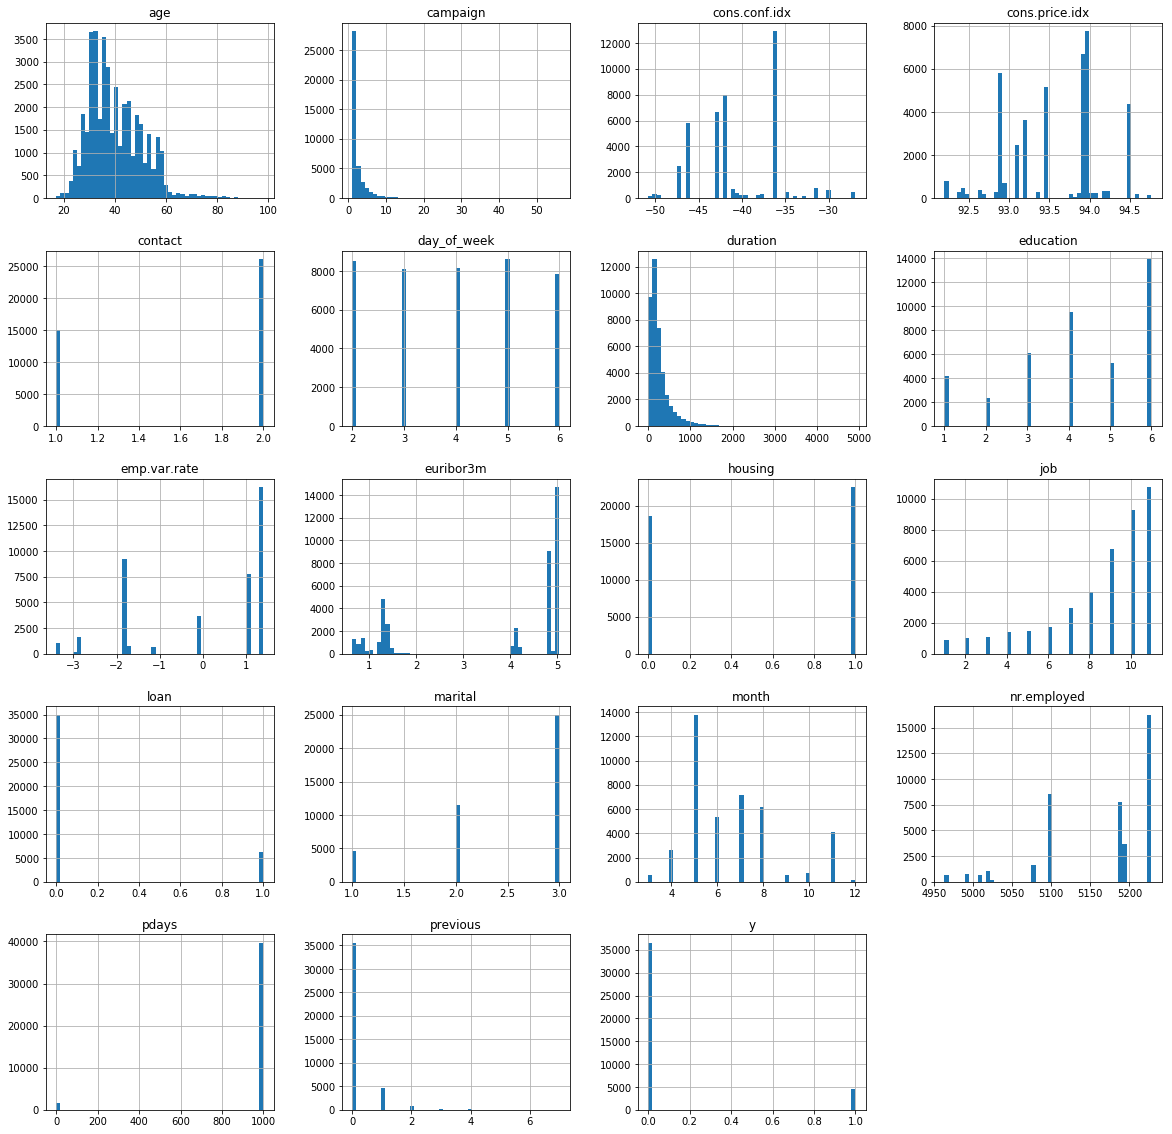

In [117]:
data_.hist(bins=50, figsize=(20,20));

In [118]:
data_.corr().style.background_gradient(cmap='PuBu').set_precision(2)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,-0.091,0.12,-0.15,-0.0018,-0.0072,-0.007,0.077,-0.018,-0.00087,0.0046,-0.034,0.024,-0.00037,0.00086,0.13,0.011,-0.018,0.03
job,-0.091,1,-8.6e-06,0.028,-0.0032,0.012,-0.0075,-0.049,0.0052,-0.0089,0.015,0.057,-0.056,0.081,0.03,-0.033,0.073,0.093,-0.058
marital,0.12,-8.6e-06,1,-0.12,-0.0085,0.0016,-0.044,0.0025,0.0043,0.00054,-0.0004,0.017,-0.029,0.048,0.024,0.051,0.054,0.05,-0.026
education,-0.15,0.028,-0.12,1,0.016,0.0092,0.11,0.12,0.005,-0.015,-0.00033,-0.044,0.039,-0.048,-0.087,0.069,-0.04,-0.042,0.056
housing,-0.0018,-0.0032,-0.0085,0.016,1,0.036,0.078,0.03,-0.0085,-0.0083,-0.011,-0.01,0.022,-0.059,-0.077,-0.032,-0.058,-0.046,0.011
loan,-0.0072,0.012,0.0016,0.0092,0.036,1,0.013,-0.0017,0.0018,0.00012,0.0053,-8.6e-05,-0.0021,0.0012,-0.0059,-0.014,-0.00049,0.0042,-0.0045
contact,-0.007,-0.0075,-0.044,0.11,0.078,0.013,1,0.32,-0.02,0.027,-0.077,-0.12,0.21,-0.39,-0.59,-0.25,-0.4,-0.27,0.14
month,0.077,-0.049,0.0025,0.12,0.03,-0.0017,0.32,1,-0.007,-0.019,-0.031,-0.08,0.064,0.059,-0.15,0.26,0.16,0.13,0.037
day_of_week,-0.018,0.0052,0.0043,0.005,-0.0085,0.0018,-0.02,-0.007,1,0.011,0.015,0.0068,0.004,-0.0044,-0.0046,-9.9e-05,-0.0056,-0.00073,0.01
duration,-0.00087,-0.0089,0.00054,-0.015,-0.0083,0.00012,0.027,-0.019,0.011,1,-0.072,-0.048,0.021,-0.028,0.0053,-0.0082,-0.033,-0.045,0.41


# O que falta?
- Dividir o conjunto em treino e teste
- Padronizar os dados
- Treinar o modelo
- Fazer uma predição
- Calcular
    - Accuracy Score
    - Precision Score
    - Recall Score
    - F1 Score
    - mse
    - rmse
- Curva ROC